In [106]:
!pip install pydotplus
!pip install graphviz



DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [21]:
!brew install graphviz

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
cargo-crev   gcc@11       gcem         git-sync     go@1.18      svt-av1

You have 5 outdated formulae installed.
You can upgrade them with brew upgrade
or list them with brew outdated.

==> Downloading https://ghcr.io/v2/homebrew/core/libpng/manifests/1.6.37
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/blobs/sha256:40b9dd222c4
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/manifests/2.12.1
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/blobs/sha256:3e190f2fa
==> Downloading from https://pkg-containers.githubusercontent.com/gh

In [109]:
pip install pydotplus


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Users/youssrarebboud/python-virtual-environments/project_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from rdflib import Graph
from rdflib import Graph, Literal, RDF, URIRef
from rdflib import URIRef, SDO, PROV
from rdflib import URIRef, RDF, RDFS, TIME
# rdflib knows about quite a few popular namespaces, like W3C ontologies, schema.org etc.
from rdflib.namespace import FOAF , XSD
import uuid
import os

In [126]:
base='http://kflow.eurecom.fr'

In [127]:
g = Graph()

In [128]:
def node_creatioon(path,entity_mention):
    
    
    uri=base+'/'+str(uuid.uuid5(uuid.NAMESPACE_DNS, path+entity_mention))
    return URIRef(uri)
    

In [129]:
def add_relation(node,predicate,obj):
    return (g.add((node, URIRef(predicate), obj)))

In [130]:

def add_provenance(statemnet,prov):
    g.add((Literal(statemnet),PROV.wasGeneratedBy, URIRef(prov)))

In [131]:
def add_label(a,label):
        g.add([a, RDFS.label,Literal( label)]) 


In [132]:
prov_node=node_creatioon('','provenance')

In [133]:
paper_node=node_creatioon('','Hong paper')
g.add((prov_node,RDF.type ,URIRef('https://www.w3.org/TR/2013/NOTE-prov-aq-20130430/#dfn-provenance-uri')))

<Graph identifier=N93a31eaab84744dc877406230114959c (<class 'rdflib.graph.Graph'>)>

In [134]:

def add_type(node,typ):
    if typ == 'event':
        g.add((node,RDF.type ,URIRef('http://purl.org/faro/Event')))
    if typ =='condition':
        g.add((node,RDF.type ,URIRef('http://purl.org/faro/Condition')))
        
        
        


In [135]:
hong = {
  'title':'Building a cross-document event-event relation corpus',
  'author':'Hong, Yu and Zhang, Tongtao and O’Gorman, Tim and Horowit-Hendler, Sharone and Ji, Heng and Palmer, Martha',
  'booktitle':'Proceedings of the 10th Linguistic Annotation Workshop held in conjunction with ACL 2016 (LAW-X 2016)',  
  'year':'2016'
}

In [136]:
add_relation(paper_node,'http://purl.org/dc/elements/1.1/title',Literal(hong['title']))
add_relation(paper_node,'http://purl.org/spar/fabio/hasPublicationYear',Literal(hong['year']))
a=add_relation(paper_node,'http://purl.org/dc/terms/creator',Literal(hong['author']))

In [137]:
a

<Graph identifier=N93a31eaab84744dc877406230114959c (<class 'rdflib.graph.Graph'>)>

In [138]:
add_relation(prov_node,'http://www.w3.org/ns/prov#used',paper_node)

<Graph identifier=N93a31eaab84744dc877406230114959c (<class 'rdflib.graph.Graph'>)>

In [139]:
relations={
'causes':'http://purl.org/faro/causes',
'enables' : 'http://purl.org/faro/enables',
'immediately before':'http://purl.org/faro/immediately_before',
'starts':'http://purl.org/faro/starts',
'Ends':'http://purl.org/faro/starts',
'contains':'http://purl.org/faro/contains',
'simoultaneous to':'http://purl.org/faro/simoultaneous_to',
'opposite to':'http://purl.org/faro/opposite_to',
'alternative to':'http://purl.org/faro/alternative_to',
#'Hong_provenance':'http://nlp. cs.rpi.edu/data/event_relation.zip',
'meets':'http://purl.org/faro/meets',
'intends':'http://purl.org/faro/intends_to_cause',
    'prevents':'http://purl.org/faro/prevents',
    'not_cause': 'http://purl.org/faro/does_not_cause'
}

    

In [140]:
import pandas as pd

In [141]:
file=pd.read_csv('mapped_data.csv', sep='\t')

In [142]:
file['rel1'] = file['rel1'].replace(to_replace='True/Related/Temporality.During/    /    /    ', value='contains', regex=True)
#mydata['rel1'] = mydata['rel1'].replace(to_replace='True/Related/Temporality.During/Relative/Included_IN/Includes', value='contains 2', regex=True)
file['rel2'] = file['rel2'].replace(to_replace='True/Related/Temporality.During/    /    /    ', value='contains', regex=True)
#mydata['rel2'] = mydata['rel2'].replace(to_replace='True/Related/Temporality.During/Relative/Included_IN/Includes', value='contains 2', regex=True)
file['rel3'] = file['rel3'].replace(to_replace='True/Related/Temporality.During/    /    /    ', value='contains', regex=True)
#mydata['rel3'] = mydata['rel3'].replace(to_replace='True/Related/Temporality.During/Relative/Included_IN/Includes', value='contains 2', regex=True)

In [143]:
file.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'evnt1id', 'evnt1text', 'evnt1type',
       'evnt2id', 'evnt2text', 'evnt2type', 'docname', 'rel1', 'rel2', 'rel3'],
      dtype='object')

In [144]:
set(file['rel2'])

{'True/Related/    /    /    /    ',
 'True/Related/Expansion.Conjunction/NA/Generation/Generation',
 'True/Related/Expansion.Conjunction/NA/Neighbourship/Neighbourship',
 'True/Related/Expansion.Conjunction/Relative/Generation/Generation',
 'True/Related/Expansion.Variation/    /    /    ',
 'True/Related/Inheritance.Reemergence/Relative/Reference/Target',
 'True/Related/Inheritance.Reemergence/Relative/Target/Reference',
 'True/Related/Inheritance.Subevent/Absolute/Ancestor/Descendant',
 'True/Related/Inheritance.Subevent/Absolute/Community/Member',
 'True/Related/Inheritance.Subevent/Absolute/Descendant/Ancestor',
 'True/Related/Inheritance.Subevent/Absolute/Member/Community',
 'True/Related/Inheritance.Subevent/Relative/Ancestor/Descendant',
 'True/Related/Inheritance.Subevent/Relative/Community/Member',
 'True/Related/Inheritance.Subevent/Relative/Descendant/Ancestor',
 'alternative to 2',
 'causes',
 'causes 2',
 'contains',
 'contains 2',
 'enables',
 'enables 2',
 'immediately 

In [145]:
'enables 2'.strip('2').strip()

'enables'

In [146]:
if 'hi' in relations:
    print('yes')

In [147]:
path='mapped_data.csv'
type1 = 'condition'
type2='event'
for index, row in file.iterrows():
    
    event1=row['evnt1type']
    event2=row['evnt2type']
    rel=[row['rel1'],row['rel2'],row['rel3']]
    for r in rel:
     if r in relations:
      if '2' in str(r):
        if str(r).strip('2').strip()=='enables':
            type1 == 'condition'
            
            type2=='event'
        
            add_relation(node_creatioon(path,event2),URIRef(relations[str(r).strip('2').strip()]),node_creatioon(path,event1))
            add_label(node_creatioon(path,event2),event2)
            add_label(node_creatioon(path,event1),event1)
            add_type(node_creatioon(event2),'condition')
            add_type(node_creatioon(event1),'event')
            
        else:
            add_relation(node_creatioon(path,event2),URIRef(relations[str(r).strip('2').strip()]),node_creatioon(path,event1))
            add_label(node_creatioon(path,event2),event2)
            add_label(node_creatioon(path,event1),event1)
            add_type(node_creatioon(path,event2),'event')
            add_type(node_creatioon(path,event1),'event')
            
            
      elif  str(r).strip()=='enables':
        add_relation(node_creatioon(path,event1),URIRef(relations[str(r).strip('2').strip()]),node_creatioon(path,event2))
        add_label(node_creatioon(path,event1),event1)
        add_label(node_creatioon(path,event2),event2)
        add_type(node_creatioon(path,event1),'condition')
        add_type(node_creatioon(path,event2),'event')
        
            
      else:
        add_relation(node_creatioon(path,event1),URIRef(relations[str(r).strip('2').strip()]),node_creatioon(path,event2))
        add_label(node_creatioon(path,event1),event1)
        add_label(node_creatioon(path,event2),event2)
        add_type(node_creatioon(path,event1),'event')
        add_type(node_creatioon(path,event2),'event')
            
        
      
    
    
   
    
    
    

In [209]:
file=pd.read_csv('/Users/youssrarebboud/Desktop/PhD/ontoed_before.csv')

In [210]:
file.columns = ['pos1', 'trigger1','type1','sentence1','pos2', 'trigger2','type2','sentence2','id']

In [211]:
file

,pos1,trigger1,type1,sentence1,pos2,trigger2,type2,sentence2,id
0,"[19, 20]",win,Transaction.Getting,Steele went on to be named the BBC Sports Pers...,"[18, 19]",received,Transaction.Receiving,"For England, the principal resistance came fro...",e37910f59b700d61c25aec7f705df552
1,"[12, 13]",obtained,Transaction.Getting,The National Transportation Safety Board repor...,"[13, 14]",received,Transaction.Receiving,The lead Thai Department of Civil Aviation inv...,9d7593f215eebf93b759820364b2725d
2,"[21, 22]",got,Transaction.Getting,"The champion team took away a prize of $40,000...","[5, 6]",received,Transaction.Receiving,The Man of the Match received $500 and the win...,015301a0d435c49f110da7f84ba4cfc3
3,"[21, 22]",got,Transaction.Getting,"The champion team took away a prize of $40,000...","[15, 16]",received,Transaction.Receiving,The Man of the Match received $500 and the win...,015301a0d435c49f110da7f84ba4cfc3
4,"[3, 5]",took away,Transaction.Getting,"The champion team took away a prize of $40,000...","[5, 6]",received,Transaction.Receiving,The Man of the Match received $500 and the win...,015301a0d435c49f110da7f84ba4cfc3
...,...,...,...,...,...,...,...,...,...
513,"[41, 42]",example,Conflict.Protest,Historian Tristram Hunt (a former Labour MP) h...,"[38, 39]",upholding,Conflict.Defending,Most media reports at the time depicted it as ...,02b8f0a1a83600051754c9610b814439
514,"[3, 4]",demonstrated,Conflict.Protest,"""Redwing"" demonstrated the first United States...","[21, 22]",defense,Conflict.Defending,Also tested were fission devices intended to b...,4ef5adfa9bb79201e550c8ccc2959ca7
515,"[9, 10]",protesting,Conflict.Protest,"On 22 November 2012, millions of protesters be...","[6, 7]",protect,Conflict.Defending,Morsi deemed the decree necessary to protect t...,212450c89ac560ee9da0bc519d92f469
516,"[1, 2]",demonstration,Conflict.Protest,The demonstration occurred during the French R...,"[15, 16]",defend,Conflict.Defending,Its objectives were to convince the government...,34ac53e7227e6f566a3f018fd412e598


In [212]:
path='ontoed_before.csv'

for index, row in file.iterrows():
    
    event1=row['trigger1']
    event2=row['trigger2']
    #rel='cause'
    
        
    add_relation(node_creatioon(path,event2),URIRef(relations['immediately before']),node_creatioon(path,event1))
    add_label(node_creatioon(path,event2),event2)
    add_label(node_creatioon(path,event1),event1)
    add_type(node_creatioon(path,event1),'event')
    add_type(node_creatioon(path,event2),'event')
            
        
        
            
      

In [158]:
file=pd.read_csv('/Users/youssrarebboud/Desktop/PhD/Extracted relations/Catena Timelink.csv')

In [159]:
file.columns=['trigger1','id1','trigger2','id2','rel','sentence','docid']

In [160]:
file.columns

Index(['trigger1', 'id1', 'trigger2', 'id2', 'rel', 'sentence', 'docid'], dtype='object')

In [161]:
set(file['rel'])

{'AFTER',
 'BEFORE',
 'BEGINS',
 'BEGUN_BY',
 'DURING',
 'ENDED_BY',
 'ENDS',
 'IAFTER',
 'IBEFORE',
 'IDENTITY',
 'INCLUDES',
 'IS_INCLUDED',
 'SIMULTANEOUS',
 nan}

In [162]:
catena_temporal_relations= {
    'BEFORE':'http://purl.org/faro/immediately_before',    
    'DURING': 'http://purl.org/faro/contains',
    'SIMULTANEOUS':'http://purl.org/faro/simoultaneous_to'    
}

In [163]:
path='catena_time.csv'

for index, row in file.iterrows():
    if row['rel'] in catena_temporal_relations: 
        event1=row['trigger1']
        event2=row['trigger2']
        


        add_relation(node_creatioon(path,event1),URIRef(catena_temporal_relations[row['rel']]),node_creatioon(path,event2))
        add_label(node_creatioon(path,event2),event2)
        add_label(node_creatioon(path,event1),event1)
        add_type(node_creatioon(path,event1),'event')
        add_type(node_creatioon(path,event2),'event')
            

In [198]:
file=pd.read_csv('/Users/youssrarebboud/Documents/GitHub/EventRelationDataset/annotation_csv/well alligned eventCausality/notcause.csv')

In [199]:
file.columns

Index(['Unnamed: 0', 'event1', 'eid1', 'event2', 'eid2', 'signal',
       'annotation', 'Doc name', 'Doc ID', 'sentence'],
      dtype='object')

In [187]:
file

,Unnamed: 0,event1,eid1,event2,eid2,signal,annotation,Doc name,Doc ID,sentence
0,0,made,e9,dropped,e10,warrant,0,2010.01.18.uk.israel.livni.tml,2010.01.18.uk.israel.livni,Details of the warrant were never made public ...
1,1,issued,e56,allow,e55,warrant,0,2010.01.18.uk.israel.livni.tml,2010.01.18.uk.israel.livni,British legal rules allow arrest warrants to b...
2,2,issued,e56,allow,e55,allow,0,2010.01.18.uk.israel.livni.tml,2010.01.18.uk.israel.livni,British legal rules allow arrest warrants to b...
3,3,revoked,e57,reported,e58,warrant,0,2010.01.18.uk.israel.livni.tml,2010.01.18.uk.israel.livni,The arrest warrant was revoked once it was cle...
4,4,enabled,e40,Elected,e38,enable,0,2010.02.26.census.redistricting.tml,2010.02.26.census.redistricting,"Elected in 1810, he signed an obscure redistri..."
5,5,signed,e39,enabled,e40,enable,1,2010.02.26.census.redistricting.tml,2010.02.26.census.redistricting,"Elected in 1810, he signed an obscure redistri..."
6,6,Elected,e38,signed,e39,enable,0,2010.02.26.census.redistricting.tml,2010.02.26.census.redistricting,"Elected in 1810, he signed an obscure redistri..."
7,7,threatened,e9,thrown,e11,allow,0,2010.03.22.africa.elephants.ivory.trade.tml,2010.03.22.africa.elephants.ivory.trade,A petition from the two African countries to r...
8,8,threatened,e9,allow,e10,allow,0,2010.03.22.africa.elephants.ivory.trade.tml,2010.03.22.africa.elephants.ivory.trade,A petition from the two African countries to r...
9,9,thrown,e11,allow,e10,allow,0,2010.03.22.africa.elephants.ivory.trade.tml,2010.03.22.africa.elephants.ivory.trade,A petition from the two African countries to r...


In [200]:
path='ours.csv'

for index, row in file.iterrows():
    if row['annotation'] == 1: 
        
        event1=row['event1']
        event2=row['event2']
        


        add_relation(node_creatioon(path,event1),URIRef(relations['not_cause']),node_creatioon(path,event2))
        add_label(node_creatioon(path,event2),event2)
        add_label(node_creatioon(path,event1),event1)
        add_type(node_creatioon(path,event1),'event')
        add_type(node_creatioon(path,event2),'event')
            

In [ ]:
path='ontoED_temporal'

for index, row in file.iterrows():
    if row['annotation'] == 1: 
        
        event1=row['event1']
        event2=row['event2']
        


        add_relation(node_creatioon(path,event1),URIRef(relations['not_cause']),node_creatioon(path,event2))
        add_label(node_creatioon(path,event2),event2)
        add_label(node_creatioon(path,event1),event1)
        add_type(node_creatioon(path,event1),'event')
        add_type(node_creatioon(path,event2),'event')

In [213]:
# Print the number of "triples" in the Graph
print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
print(g.serialize(format="turtle"))

Graph g has 5521 statements.
@prefix ns1: <http://purl.org/faro/> .
@prefix ns2: <http://purl.org/dc/terms/> .
@prefix ns3: <http://purl.org/spar/fabio/> .
@prefix ns4: <http://www.w3.org/ns/prov#> .
@prefix ns5: <http://purl.org/dc/elements/1.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://kflow.eurecom.fr/008c2490-c85d-56d4-8180-d632d0b073f1> a ns1:Event ;
    rdfs:label "assemble" ;
    ns1:causes <http://kflow.eurecom.fr/d6131bfa-b246-56a6-9bcb-526e6e7d15b1> .

<http://kflow.eurecom.fr/00b2f9a3-c2de-51e1-9dcd-eb5334041e9c> a ns1:Event ;
    rdfs:label "leave" ;
    ns1:immediately_before <http://kflow.eurecom.fr/44b38280-1816-561a-adc0-288e8c5dc393> .

<http://kflow.eurecom.fr/01795814-b90b-5262-a64e-368f6fc51f92> a ns1:Event ;
    rdfs:label "earthquake" ;
    ns1:causes <http://kflow.eurecom.fr/4a4d64f7-d825-50aa-9c41-cb13d9272f3b>,
        <http://kflow.eurecom.fr/7982cb2e-b03b-56c7-a308-829914906035>,
        <http://kflow.eurecom.fr/9cbe14d9-5483-5dd7-a4

In [44]:
add_label(a,'labl')

In [65]:
for i in g:
    node=i
    break

In [66]:
node

(rdflib.term.URIRef('http://Kflow.eurecom.fr/event/e28f4433-c6bd-552e-a94b-dd40095554a5'),
 rdflib.term.URIRef('http://purl.org/faro/causes'),
 rdflib.term.URIRef('http://Kflow.eurecom.fr/event/312d101c-4f91-5d86-a1f2-1ef44d86a4a7'))

In [71]:
g.add((Literal(node),PROV.wasGeneratedBy, Literal( 'me')))

<Graph identifier=N64bb9369bd8440afb417066727409274 (<class 'rdflib.graph.Graph'>)>

In [32]:
causes='http://purl.org/faro/causes'
enables='http://purl.org/faro/enables'
Immediately_before='http://purl.org/faro/immediately_before'
Starts='http://purl.org/faro/starts'
Ends='http://purl.org/faro/starts'
Contains='http://purl.org/faro/contains'
Simulations_to='http://purl.org/faro/simoultaneous_to'
Opposite_to=' http://purl.org/faro/opposite_to'
Alternative_to='http://purl.org/faro/alternative_to'
Hong_provenance:'http://nlp. cs.rpi.edu/data/event_relation.zip'

In [108]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=6264aab0dbb6ca0e5eb8ccb926e283341d03ee3584c5e73aa2cc456e7dc599de
  Stored in directory: /Users/youssrarebboud/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Users/youssrarebboud/python-virtual-environments/project_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

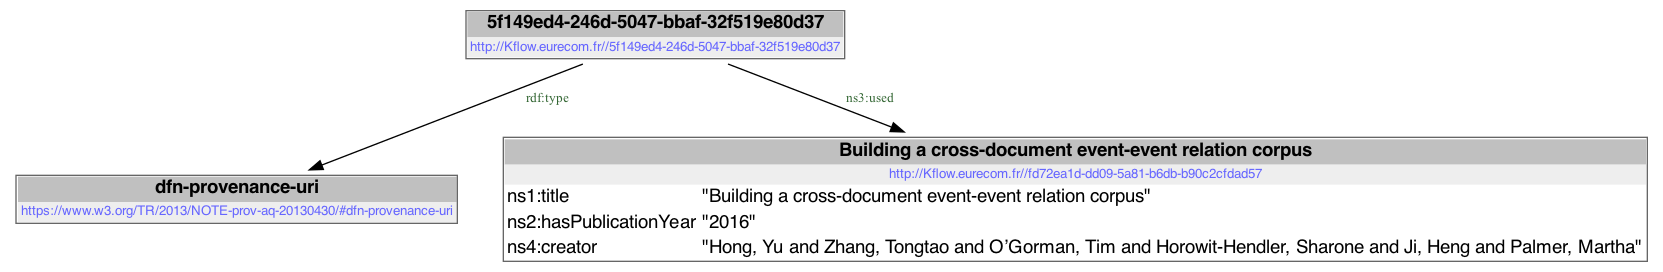

In [18]:
def visualize(a):
    stream = io.StringIO()
    rdf2dot(a, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(a)

In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.6 MB/s eta 0:00:0000:0100:01
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


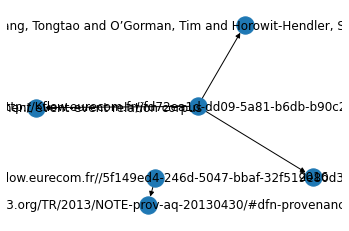

In [22]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

#url = 'https://www.w3.org/TeamSubmission/turtle/tests/test-30.ttl'

#g = rdflib.Graph()
#result = g.parse(url, format='turtle')

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()